In [200]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer

In [201]:
df = pd.read_csv('train.csv')

df.columns.str.match('Unnamed')

df=df.loc[:, ~df.columns.str.match('Unnamed')]
# df['Age'] = pd.to_numeric(df['Age'])
df.head()
# df['Age'] = df['Age'].apply(pd.to_numeric)
# df['Age'] = df['Age'].astype('int') Can't convert NaN to int
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [202]:
Age = df.iloc[:,4:5]
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(Age.iloc[:,:])
Age.iloc[:,:] = imputer.transform(Age.iloc[:,:])
# df['Age'].fillna(df['Age'].mean)
df['Age'] = Age
print(df['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [203]:
df['Sex'] = df['Sex'].astype('str')
for i, gender in df.iterrows():
    if df.loc[i,'Sex'] == 'male':
        df.loc[i,'Sex']=1
    else:
        df.loc[i,'Sex'] = 0
# print(df['Sex'])
print(df.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Survived  
0    1  22.0      1      0         A/5 21171   7.2500   NaN        S         0  
1    0  38.0      1      0          PC 17599  71.2833   C85        C         1  
2    0  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S         1  
3    0  35.0      1      0            113803  53.1000  C123        S         1  
4    1  35.0      0      0            373450   8.0500   NaN        S         0  


In [204]:
df['Age'] = df['Age'].astype('int64')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,0


In [205]:
df['Cabin'].isnull().sum()

687

In [206]:
df['Fare'].max()

512.3292

In [207]:
df['Age'].max()

80

In [ ]:
from sklearn import preprocessing
Ages = df.iloc[:,4:5].values
minmaxscalar_as = preprocessing.MinMaxScaler(feature_range=(0,1))
f_scale =  minmaxscalar_as.fit_transform(Ages)
df['Age'] = f_scale

Fares = df.iloc[:,8:9].values
minmaxscalar_as = preprocessing.MinMaxScaler(feature_range=(0,1))
fa_scale =  minmaxscalar_as.fit_transform(Fares)
df['Fare'] = fa_scale
print(df.head())

In [209]:
df.rename(columns={"Sex":"Male"},inplace=True)

In [211]:
df['Embarked'] = df['Embarked'].astype('str')
from sklearn.preprocessing import LabelEncoder
dfle = df
le = LabelEncoder()
dfle.Embarked = le.fit_transform(dfle.Embarked)
dfle.Pclass = le.fit_transform(dfle.Pclass)
dfle.Male = le.fit_transform(dfle.Male)
dfle.head()

,PassengerId,Pclass,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,2,"Braund, Mr. Owen Harris",1,0.2750,1,0,A/5 21171,0.014151,NaN,2,0
1,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,1,0,PC 17599,0.139136,C85,0,1
2,3,2,"Heikkinen, Miss. Laina",0,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,2,1
3,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,1,0,113803,0.103644,C123,2,1
4,5,2,"Allen, Mr. William Henry",1,0.4375,0,0,373450,0.015713,NaN,2,0


In [212]:
X = dfle[['PassengerId','Pclass','Name','Male','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
Y = dfle['Survived']

In [213]:
PClass=pd.get_dummies(df['Pclass'],prefix='Pclass',drop_first=True)
df=pd.concat([df,PClass],axis=1)
df.drop(['Pclass'],axis=1,inplace=True)
df

,PassengerId,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Pclass_1,Pclass_2
0,1,"Braund, Mr. Owen Harris",1,0.2750,1,0,A/5 21171,0.014151,NaN,2,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,1,0,PC 17599,0.139136,C85,0,1,0,0
2,3,"Heikkinen, Miss. Laina",0,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,2,1,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,1,0,113803,0.103644,C123,2,1,0,0
4,5,"Allen, Mr. William Henry",1,0.4375,0,0,373450,0.015713,NaN,2,0,0,1
5,6,"Moran, Mr. James",1,0.3625,0,0,330877,0.016510,NaN,1,0,0,1
6,7,"McCarthy, Mr. Timothy J",1,0.6750,0,0,17463,0.101229,E46,2,0,0,0
7,8,"Palsson, Master. Gosta Leonard",1,0.0250,3,1,349909,0.041136,NaN,2,0,0,1
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.3375,0,2,347742,0.021731,NaN,2,1,0,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.1750,1,0,237736,0.058694,NaN,0,1,1,0


In [214]:
Embarked=pd.get_dummies(df['Embarked'],prefix='Embarked',drop_first=True)
df=pd.concat([df,Embarked],axis=1)
df.drop(['Embarked'],axis=1,inplace=True)
df

,PassengerId,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Pclass_1,Pclass_2,Embarked_1,Embarked_2,Embarked_3
0,1,"Braund, Mr. Owen Harris",1,0.2750,1,0,A/5 21171,0.014151,NaN,0,0,1,0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,1,0,PC 17599,0.139136,C85,1,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",0,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,1,0,1,0,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,1,0,113803,0.103644,C123,1,0,0,0,1,0
4,5,"Allen, Mr. William Henry",1,0.4375,0,0,373450,0.015713,NaN,0,0,1,0,1,0
5,6,"Moran, Mr. James",1,0.3625,0,0,330877,0.016510,NaN,0,0,1,1,0,0
6,7,"McCarthy, Mr. Timothy J",1,0.6750,0,0,17463,0.101229,E46,0,0,0,0,1,0
7,8,"Palsson, Master. Gosta Leonard",1,0.0250,3,1,349909,0.041136,NaN,0,0,1,0,1,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.3375,0,2,347742,0.021731,NaN,1,0,1,0,1,0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.1750,1,0,237736,0.058694,NaN,1,1,0,0,0,0


In [215]:
new_da = df.to_csv('new_data.csv')

In [216]:
df.columns

Index(['PassengerId', 'Name', 'Male', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Survived', 'Pclass_1', 'Pclass_2', 'Embarked_1',
       'Embarked_2', 'Embarked_3'],
      dtype='object')

In [217]:
df.head()

,PassengerId,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Pclass_1,Pclass_2,Embarked_1,Embarked_2,Embarked_3
0,1,"Braund, Mr. Owen Harris",1,0.2750,1,0,A/5 21171,0.014151,NaN,0,0,1,0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.4750,1,0,PC 17599,0.139136,C85,1,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",0,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,1,0,1,0,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.4375,1,0,113803,0.103644,C123,1,0,0,0,1,0
4,5,"Allen, Mr. William Henry",1,0.4375,0,0,373450,0.015713,NaN,0,0,1,0,1,0


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df[['Male', 'Age', 'SibSp', 'Parch','Fare', 'Pclass_1', 'Pclass_2', 'Embarked_1','Embarked_2', 'Embarked_3']]
y = df['Survived']
logisticRegr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
score1 = logisticRegr.score(x_train, y_train)

print(score)
print(score1)

0.7937219730941704
0.8053892215568862


C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [241]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets

svm = LogisticRegression()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(dataset.data, dataset.target)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Darsb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [235]:
import seaborn as sns

In [238]:
import matplotlib.pyplot as plt

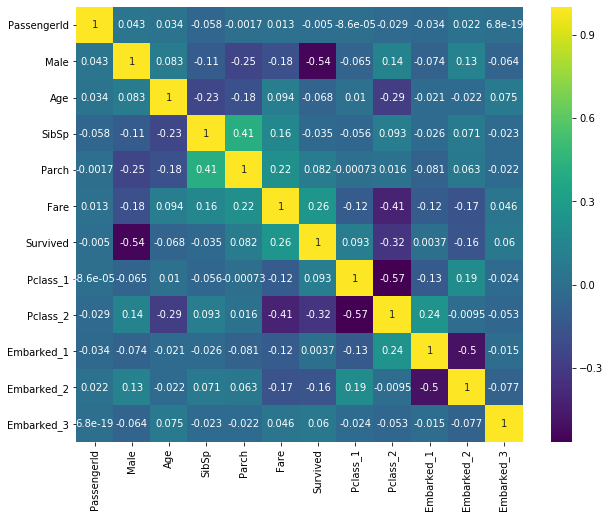

In [244]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [243]:
# from scipy.stats import pearsonr
# X = df['Male]
# Y = df['Survived']

# #plot the variables to show linearity
# plt.scatter(X,Y)
# plt.show()
# pearsonr(X,Y)

SyntaxError: EOL while scanning string literal (<ipython-input-243-c49107e1411f>, line 2)